In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2
from laser import laser
from lens import lens
import serial
import time



In [18]:
# gstreamer_pipeline returns a GStreamer pipeline for capturing from the CSI camera
# Defaults to 1280x720 @ 60fps
# Flip the image by setting the flip_method (most common values: 0 and 2)
# display_width and display_height determine the size of the window on the screen


def gstreamer_pipeline(
    capture_width=1280,
    capture_height=720,
    display_width=1280,
    display_height=720,
    framerate=60,
    flip_method=0,
):
    return (
        "nvarguscamerasrc sensor_id=0 ! "
        "video/x-raw(memory:NVMM), "
        "width=(int)%d, height=(int)%d, "
        "format=(string)NV12, framerate=(fraction)%d/1 ! "
        "nvvidconv flip-method=%d ! "
        "video/x-raw, width=(int)%d, height=(int)%d, format=(string)BGRx ! "
        "videoconvert ! "
        "video/x-raw, format=(string)BGR ! appsink"
        % (
            capture_width,
            capture_height,
            framerate,
            flip_method,
            display_width,
            display_height,
        )
    )



254.99376808449074


<IPython.core.display.Javascript object>


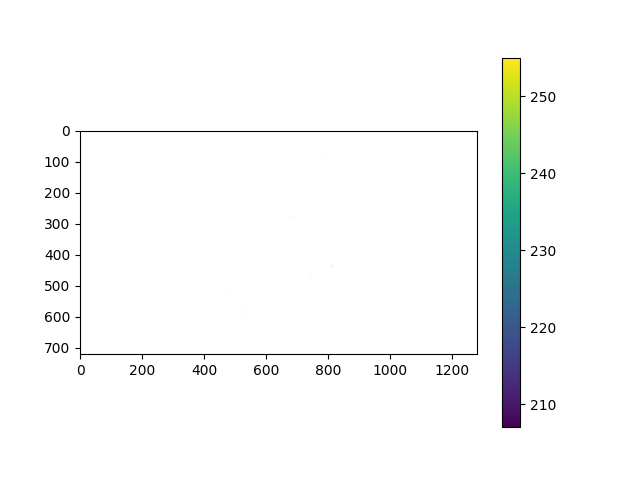

(720, 1280, 3)


numpy.ndarray

In [30]:
mycam_cmd = gstreamer_pipeline(framerate=21)
cap = cv2.VideoCapture(mycam_cmd) 

# let the camera warm up
for i in range(100):
    state,img = cap.read()
    #
    print(np.mean(img))
plt.figure(i), plt.imshow(img),plt.colorbar(), plt.show
print(img.shape)
type(img)

Initializing Lens 1
Printing Buffer: *LENS1X+1000#
Printing Buffer: *LENS1Z+1000#
Printing Buffer: *LENS1X+2000#


<IPython.core.display.Javascript object>


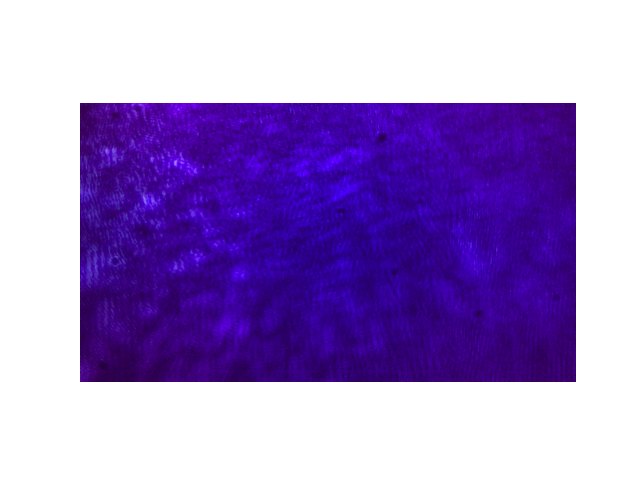

Printing Buffer: *LENS1Z+10000#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printing Buffer: *LENS1X+0#
Printing Buffer: *LENS1X+10000#
<class 'numpy.ndarray'>
(720, 1280, 3)
Printi

KeyboardInterrupt: 

In [31]:
# open the lens and move it 
serialport = "/dev/ttyUSB0"
if not('serialconnection' in locals() and serialconnection.is_open):
        serialconnection = serial.Serial(serialport,115200,timeout=1) # Open grbl serial port

print('Initializing Lens 1')
# init lens
lens_1 = lens(serialconnection, lens_id = 1)
pos_x2 = lens_1 .get_position(direction="X")
lens_1.move(pos_x2+1000, "X")

   

def showstream(ax, frame):
    ax.imshow(frame)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')


mydirection = "X"
lens_1.move(10000, "Z")
for i in range(100):
    
    lens_1.move(10000, mydirection)
    _,img = cap.read()  
    print(type(img))
    print(img.shape)
    showstream(ax, img)
    time.sleep(.2)
    
    lens_1.move(0, mydirection)
    _,img = cap.read()
    showstream(ax, img)
    time.sleep(.2)

In [32]:
lens_1.move(0, "Z")
lens_1.move(0, "X")



Printing Buffer: *LENS1Z+0#
Printing Buffer: *LENS1X+0#


In [33]:
serialconnection.close()
cap.release()